# Exercise 3

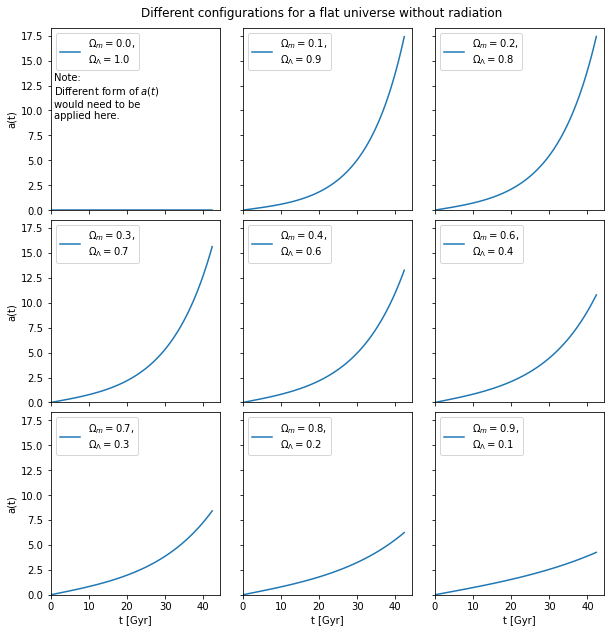

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9

H_0 = WMAP9.H(0)


def a(t, Omega_m):
    Omega_Lambda = 1-Omega_m
    t_acc = 2/(3*H_0*Omega_Lambda**0.5)
    return (Omega_m/Omega_Lambda)**(1/3)*np.sinh((t/t_acc).to_value())


times = np.linspace(0, 3, 100) / H_0

omega_m_space = np.linspace(0, 1, 10)
ncols = 3
nrows = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 9), sharex=True, sharey=True)
fig.tight_layout(h_pad=0, w_pad=0, pad=3)
for ax, omega_m in zip(axes.flatten(), omega_m_space):
    params = a(times, omega_m)
    label = f"$\Omega_m={omega_m:.1f}$,\n$\Omega_\Lambda={1-omega_m:.1f}$"
    ax.plot(times.to("Gyr"), params, label=label)
    ax.legend(loc="upper left")
for ax in axes[2]:
    ax.set_xlabel("t [Gyr]")
    ax.set_xlim(left=0)
for ax in axes[:, 0]:
    ax.set_ylim(bottom=0)
    ax.set_ylabel("a(t)")
fig.suptitle("Different configurations for a flat universe without radiation")
axes[0][0].text(0.02, 0.5, "Note:\nDifferent form of $a(t)$\nwould need to be\napplied here.", transform=axes[0][0].transAxes)
fig.savefig("../ps11_03_configurations.png")
